In [100]:
import pandas as pd
import numpy as np
import baseline
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('../Rawdata/PadraoK3_Gaiola_cell3eletrodos.txt', sep='\t')
df.head()

,E /V,I /uA,I /uA.1
0,0.500,0.130,7.040
1,0.499,0.102,6.998
2,0.498,0.083,6.964
3,0.497,0.064,6.932
4,0.496,0.061,6.908


In [6]:
x = pd.to_numeric(df['E /V'])
y = pd.to_numeric(df['I /uA.1'])
x1,x2=baseline.split_vector(x)
y1,y2=baseline.split_vector(y)

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


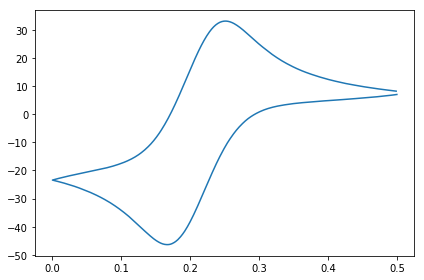

In [25]:
plt.plot(x,y)

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


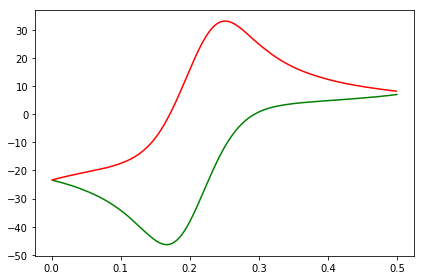

In [28]:
plt.plot(x1, y1, 'g-', x2, y2, 'r-')


In [99]:
m = (baseline.multiplica(x2,y2) - baseline.soma(x2) * baseline.media(y2)) / (baseline.multiplica(x2,x2) - baseline.soma(x2) * baseline.media(x2))
#m = (y2-baseline.media(y2)).sum() / (x2-baseline.media(x2)).sum()
m

83.31208527899179

In [31]:
b = baseline.media(y2) - m * baseline.media(x2)
b

-14.865536349808064

In [40]:
dy = np.diff(y2)/(np.diff(x2))
for i in range(len(dy)-5): 
    a = 0 
    for j in range(0,5):
        a = a + dy[i+j]
print(a)

-142.99999999999872


In [ ]:
idx = np.argwhere(np.diff(np.sign(ave15 - ave5[:len(ave15)])!= 0).reshape(-1)

In [95]:
ave5 = []
ave15 = []
for i in range(len(x2)-2): 
    a = 0 
    for j in range(0,2):
        a = a + dy[i+j]
    ave5.append(round(a/2, 9))
ave5 = np.asarray(ave5)
for i in range(len(x2)-15): 
    b = 0 
    for j in range(0,15):
        b = b + dy[i+j]
    ave15.append(round(b/15, 9))
ave15 = np.asarray(ave15)
idx = np.argwhere(np.diff(np.sign(ave15 - ave5[:len(ave15)]))!= 0).reshape(-1)
int(idx[0])

9

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


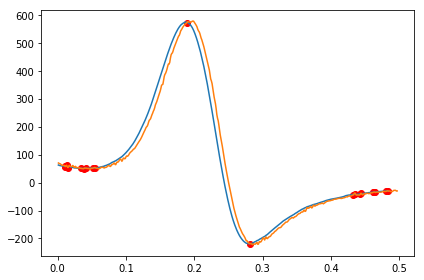

In [87]:
# This is to check out what is happening there.
# you can play with numbers above to see how it changes.
plt.plot(x2[idx], ave5[idx], 'ro') ## Plot intersections 
plt.plot(x2[0:len(ave15)], ave15, x2[0:len(ave5)], ave5) ## Plot moving averages


In [ ]:
def linear_coeff(x, y):
    """
    This function returns the inclination coeffecient and y axis interception coeffecient m and b. 
    """
    soma_x = soma(x)
    soma_x2 = multiplica(x,x) 
    soma_xy = multiplica(x,y) 
    media_x = media(x)
    media_y = media(y)
    m = (soma_xy - soma_x * media_y) / (soma_x2 - soma_x * media_x)
        
    ## Y axis intercept coeff
    media_x = media(x)
    media_y = media(y)
    b = media_y - m * media_x
        
        return m, b